## A Beginner Guide to Machine Learning Modeling: Tutorial with Python and Scikit-Learn **(Part4)**

In this final Part of the Machine Learning Starter Guide installment will be covering:

* Hyperparameter tuning to improve our metrics
* Machine Learnng Pipelines



## 1. Improving model predictions through experimentation (hyperparameter tuning)

The first predictions you make with a model are genrally referred to as **baseline predictions**.

It's similar for the first evaluation metrics you get. These are generally referred to as **baseline metrics**.

Your next goal is to improve upon these baseline metrics.

How?

***Experiment***,***Experiment***,***Experiment***!

Two of the main methods to improve baseline metrics are:

1. From a data perspective.
2. From a model perspective.

From a data perspective we would ask:

* Could we collect more data? In machine learning, more data is generally better, as it gives a model more opportunities to learn patterns.
* Could we improve our data? This could mean filling in missing values or finding a better encoding (turning data into numbers) strategy.

From a model perspective we would ask:

* Is there a better model we could use? if you've started out with a simple model, could you use a more complex one?(we saw an example of this when looking at the [Scikit-Learn machine learning map](https://scikit-learn.org/stable/machine_learning_map.html), ensemble methods are generally considered more complex models)
* Could we improve the current model? If the model you're using performs well straight out of the box, can the hyperparameters be tuned to make it even better?

  **Note:** Patterns in data are also often referred to as data parameters. The difference between ***parameters*** and ***hyperparameters*** is a machine learning model seeks to find parameters in data on its own, where as, hyperparameters are settings on a model which a person (you) can adjust.

Since we have two existing datasets, we'll look at how we could improve our `RandomForestClassifier` and `RandomForestRegressor` models through hyperparameter tuning.

First let's look at what are hyperparameters to begin with.

We'll first instatiate a `RandomForestClassifier`.



In [1]:
# Import Necessary Libraries
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np

In [2]:
# Import our datasets 
heart_disease = pd.read_csv('heart-disease.csv')

In [3]:
housing = fetch_california_housing()
housing_df = pd.DataFrame(data=housing['data'], 
                          columns=housing['feature_names'])
housing_df['target'] = pd.Series(data=housing['target'])

In [4]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
# Instatiate a `RandomForestClassifier`
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

When we instatiate a model like above, we're using the default hyperparameters.

These get printed out when you call the model instance and `get_params()`

In [6]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

You'll see things like `max_depth`, `min_samples_split`, `n_estimators`.

Each of these is a hyperparameter of the `RandomForestClassifier` you can adjust.

You can think of hyperparameters as being a dial on an oven.

On the default setting your oven might do okay cooking your favorite meal. But with a little experimentation, you find it does better when you adjust the settings.

The same goes for improving a machine learning model by hyperparameter tuning.

The default hyperparamters on a machine learning model may find patterns in data well. But there's a chance adjusting the hyperparameters may improve a moels performance.

Every machine learning model will have different hyperparameters you can tune.

You might be thinking, "how would I remember all of these? "

That would be a good question.

It's why we're focused on the Random Forest.

Instead of memorizing all of the hyperparameters for every model, we'll see how it's done with one.

And then knowing these priciples, you can apply them to different models if needed.

Reading the [Scikit-Learn documentation for the Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), you'll find they suggest trying to change `n_estimators`(the number of tress in the forest) and `min_samples_split`(the minimum number of samples required to split an internal node).

We'll try tuning these as well as:

* `max_features`(the number of features to consider when looking for the best split)
* `max_depth`(the maximum depth of the tree)
* `min_samples_leaf`(the minimum number of samples requires to be a leaf node)

If this sounds like alot, the good news is, the process we're taking with Random Forest and tuning its hyperparameters, can be used for other machine learning models in **Scikit-Learn**. The only difference is, with a different model, the hyperparameters you tune will be different.

Adjusting hyperparameters is usually an experimental process to figure out which are the best. As there's no real way of knowing which hyperparameters will be the best starting out.

To get familiar with hyperparameter tuning, we'll take our RandomForestClassifier and adjust it's hyperparametersin 3 ways.

1. By hand.
2. Randomly with `sklearn.model_selection.RandomizedSearchCV`
3. Exhaustively with `sklearn.model_selection.GridSearchCV`

## 1.1 Tuning hyperparameter by hand 

So far we've worked with training and test datasets

You train a model on a training set and evaluate it on a test dataset.

But hyperparameter tuning introduces a third set, a validation set.

Now the process becomes:

1. Train a model on the training data.
2. (Try to) improve the model's hyperparameters on the validation set.
3. Evaluate the model on the test set.

Since we know we're using a `RandomForestClassfier` and we know the hyperparameters we want to adjust, let's see what it looks like.

First, let's remind ourselves of the base parameters.

In [7]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

And we're going to adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

We'll use the same code as before, except this time we'll create a training, validation, adn test split.

With the training set containing 70% of the data and the validation and test sets each containing 15%.

Let's get some baseline results, then we'll tune the model.

And since we're going to be evaluating a few models, let's make an evaluaton function.

In [8]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

def evaluate_preds(y_true: np.array,
                   y_preds: np.array) -> dict:
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.

    Returns several metrics in the form of a dictionary.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy *100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Set up random seed
np.random.seed(42)


# Read in the data
heart_disease = pd.read_csv('heart-disease.csv')

# Split into X (features) and y (labels)
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Training and test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3)

# Create a validation and test split by splitting testing data in half
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5)

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

# Make predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 80.00%
Precision: 0.78
Recall: 0.88
F1 score: 0.82


{'accuracy': 0.8, 'precision': 0.78, 'recall': 0.88, 'f1': 0.82}

In [10]:
# Check the sizes of the splits
print(f"Training data: {len(X_train)} samples, {len(y_train)} labels")
print(f"Validation data: {len(X_valid)} samples, {len(y_valid)} labels")
print(f"Testing data: {len(X_test)} samples, {len(y_test)} labels")

Training data: 212 samples, 212 labels
Validation data: 45 samples, 45 labels
Testing data: 46 samples, 46 labels


Nice! now let's try and improve the results.

We'll change 1 of the hyperparameters,`n_estimators=100`(default) to `n_estimators=200` and see if it improves on the validation set.

In [11]:
np.random.seed(42)

# Create a second classifier
clf_2 = RandomForestClassifier(n_estimators=200)
clf_2.fit(X_train, y_train)

# Make predictions
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the 2nd classifier 
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc: 77.78%
Precision: 0.77
Recall: 0.83
F1 score: 0.80


it looks like doubling the `n_estimators` value performs ***worse*** than the default, perhaps there's a better value for `n_estimators`?

And what other hyperparameters could we change?

But wait..

This could take a while if all we're doing is building new models with hyperparameters each time.

Surely there's a better way?

And There is..

## 1.2 Hyperparameter tuning with `RandomizedSearchCV`

Scikit-Learn's `sklearn.modell_selection.RandomizedSearchCV` allows us to randomly across different hyperparameters to see which works best.

It also stores details about the ones which work the best!

Let's see it in action.

First, we create a dictionary of parameter distributions (collections of diiferent values for specific hyperparameters) we'd like to search over.

This dictionary comes in the form:

``` param_distibutions = {'hyperparameter name': [values_to_randomly_try]} ```

Where `"hyperparameter_name"` is the value of a specific hyperparameter for a model and `[values_to_randomly_try]`is a list of values for that specific hyperparameter to randomly try.

In [12]:
# Hyperparameter grid RandomizedSearchCV will search over
param_distributions = {'n_estimators':[10, 100, 200, 500, 1000, 1200],
                       'max_depth':[None, 5, 10, 20, 30],
                       'max_features':['sqrt', 'log2', None],
                       'min_samples_split': [2, 4, 6, 8],
                       'min_samples_leaf': [1, 2, 4, 8]}

Where did these values come from?

Reading the [Scitkit-Learn Documentation on Random Forest's](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) you'll see some of these values have certain values which usually perform well and certain hyperparameters take strings rather than intergers.

Now we've got the parameter distribution dictionary setup, Scikit-Learn's `RandomizedSearchCV` will look at it, pick a random value from each, instatiate a model with those values and test each model.

How many models will it test?

As many as there are for each combination of hyperparameters to be tested. Let's add them up.

In [14]:
# Count the total number of hyperparameter combinations to test
total_randomized_hyperparameter_combinations_to_test = np.prod([len(value) for value in param_distributions.values()])
print(f"There are {total_randomized_hyperparameter_combinations_to_test} potential combinations of hyperparameters to test")

There are 1440 potential combinations of hyperparameters to test


That's alot of comabinations!

Or...

We can set the `n_iter` parameter to limit the number of models `RandomizedSearchCV` tests (e.g. `n_iter=20` means to try `20` different combinations of hyperparameters and will cross-validate each set, so if `cv=5`, 5x20= 100 total fits.)

What's actually pretty cool is that the results be cross-validated(hence the CV in `RandomizedSearchCV`) so we can use `train_test_split()`.

And since we're going over so many different models, we'll set `n_jobs=-1` in our `RandomForestClassifer` so Scikit-Learn takes advantage of all the cores (processors) on our computers.

Let's see it in action.

**Note:** Depending on `n_iter` (how many models you test), the different values in the hyperparameter grid, and the power of your computer , running the cell below may take awhile (for reference, it took about ~1 minute on my MacBook Pro).

In [16]:
# Start the timer
import time
start_time = time.time()

from sklearn.model_selection import RandomizedSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2)
# Set n_jobs to -1 to use all available cores on your machine (if this causes errors, try n_jobs=1)
clf = RandomForestClassifier(n_jobs=-1)

# Set up RandomizedSearchCV
n_iter = 30
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=param_distributions,
                            n_iter=n_iter,
                            cv=5, # 5-fold cross-validation
                            verbose=2) # print out the results

# Fit the RandomizedSearchCV version of clf (does cross-validation for us, so no need to use a validation set)
rs_clf.fit(X_train,y_train)

# Finish the timer
end_time = time.time()
print(f"[INFO] The total time taken for {n_iter} random combinations of hyperparameters: {end_time-start_time:.2f} seconds")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=None, min_samples_leaf=8, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END max_depth=10, max_features=None, min_samples_leaf=8, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END max_depth=10, max_features=None, min_samples_leaf=8, min_samples_split=2, n_estimators=50

When `RandomizedSearchCV` goes through `n_iter` combinations of hyperparameters search space, it stores the best ones in the attribute `best_params_`

In [17]:
# Find the best hyperparameters found by RandomizedSearchCV
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 30}

Now when we call `predict()` on `rs_clf` (our `RandomizedSearchCV` version of our classifier), it'll use the best hyperparameters it found

In [18]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 85.25%
Precision: 0.85
Recall: 0.88
F1 score: 0.86


Nice!

Thanks to `RandomizedSearchCV` testing out a bunch of different hyperparameters, we get a nice boost to all of the evaluation metrics for our classificaton model.

## 1.3 Hyperparameter tuning with `GridSearchCV`



There's one more way we could try to improve our model's hyperparameters.

And it's with [`sklearn.model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)`.

The main difference between `GridSearchCV` and `RandomizedSearchCV` is `GridSearchCV` searches across a grid of hyperparameters exhaustively (it'll try every combination possible), where as, `RandomizedSearchCV` searches across a grid of hyperparameters randomnly (stopping after `n_iter` combinations).

`GridSearchCV` also refers to a dictionary of parameter distributions as a parameter grid (via the parameter `param_grid`)

For example, let's see out dictionary of hyperparameters.

In [20]:
param_distributions

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['sqrt', 'log2', None],
 'min_samples_split': [2, 4, 6, 8],
 'min_samples_leaf': [1, 2, 4, 8]}

`RandomizedSearchCV` tries `n_iter` combinations of differenr values.

Where as, `GridSearchCCV` will try every single possible combination.

And if you remember from before when we did the calculation: `max_depth` has 4 values, `max_features` has 2, `min_samples_leaf` has 4, `min_samples_spit` has 4, `n_estimators` has 6.

That's 4x2x4x4x6 = 768 models!

This could take a long time depending on the power of the computer you're using, the amount of data you have and the complexity of the hyperparameters (usualy higher values means a more complex model).

In our case, the data we're using is relatively small ( only ~300 samples).

Since we've already tried to find some ideal hyperparameters using `RandomizedSearchCV`, we'll create another hyperparameter grid based on the `best_params_` of `rs_clf` with less options and then try to use `GridSearchCV` to find a more idel set.

in essence, the workflow could be:

1. Tune hyperparameters by hand to get a feel of the data/model.
2. Create a large set of hyperparameter distributions and search across them randomly with `RandomizedSearchCV`
3. Find the best hyperparameters from 2 and reduce the search space before searching across a smaller subset exhaustively with `GridSearchCV`

   **Note:** Based on the `best_params_` of `rs_clf` implies the next step of hyperparameters we'll try are roughly in the same range of the best set found by `RandomizedSearchCV`.

In [21]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 30}

In [28]:
# Create hyperparameter grid similar to rs_clf.best_params_
param_grid = {"n_estimators": [200, 1000],
              "max_depth": [30, 40, 50],
              "max_features":["log2"],
              "min_samples_split": [2, 4, 6, 8],
              "min_samples_leaf": [4]}

We've created another grid of hyperparameters to search over, this time with less total.

In [29]:
# Count the total number of hyperparameter combinations to test
total_grid_search_hyperparameter_combinations_to_test = np.prod([len(value) for value in param_grid.values()])
print(f"There are {total_grid_search_hyperparameter_combinations_to_test} comibinations of hyperparameters to test.")
print(f"This is {total_randomized_hyperparameter_combinations_to_test/total_grid_search_hyperparameter_combinations_to_test} times less\
than before (previous:{total_randomized_hyperparameter_combinations_to_test}).")

There are 24 comibinations of hyperparameters to test.
This is 60.0 times lessthan before (previous:1440).


Now when we run `GridSearchCV`, passing it our classifer `(clf)`, parameter grid `(param_grid)` and the number of cross-validation folds we'd like to use `(cv=5)`, it'll create a model with every single combination of hyperparameters, and then cross-validate each 5 times (for example, 36 hyperparameter combinations *5 = 135 fits in total) and check the results.

 **Note:** Depending on the computer power of the machine you're using, the following cell may take a few minutes to run (for reference, it took ~60 seconds on my MacBookPro).

In [30]:
# Start the timer 
import time
start_time = time.time()

from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

# Set n_jobs =-1 to use all available machine cores (if this produces errors, try n_jobs=1)
clf = RandomForestClassifier(n_jobs=-1)

# Set up GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                     param_grid=param_grid,
                     cv=5, # 5 - fold cross-validation
                     verbose=2) # print out the progress

# Fit the GridSearchCV version of clf
gs_clf.fit(X_train, y_train)

# Find the running time
end_time = time.time()

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   1.3s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   1.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=

In [31]:
# how long did it take ?
total_time = end_time - start_time
print(f"[INFO] The total run time for running GridSearchCV was {total_time:.2f} seconds.")

[INFO] The total run time for running GridSearchCV was 87.93 seconds.


Once it completes, we can check the best hyperparameter combinations it found using the `best_params_` attribute.

In [48]:
# Check the best hyperparameters found with GridSearchCV
gs_clf.best_params_

{'max_depth': 30,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 200}

And by default when we call the `predict()` function on `gs_clf`, it'll use the best hyperparameters.

In [49]:
# Make predictions with the GridSearchCV classifier 
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions 
gs_metrics = evaluate_preds(y_test, gs_y_preds)
gs_metrics

Acc: 88.52%
Precision: 0.88
Recall: 0.91
F1 score: 0.89


{'accuracy': 0.89, 'precision': 0.88, 'recall': 0.91, 'f1': 0.89}

Let's create a DataFrame to compare the different metrics

<Axes: >

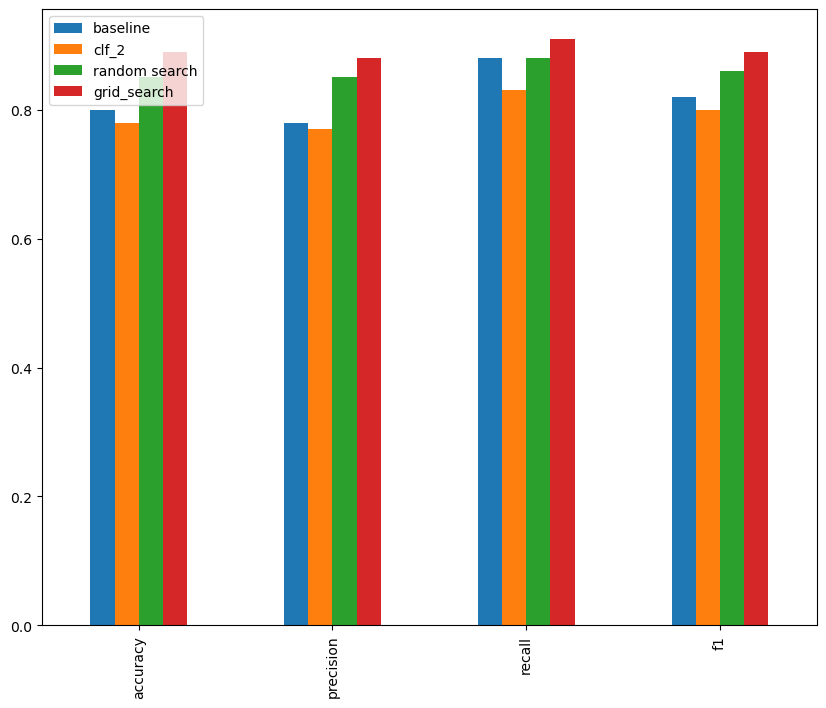

In [50]:
import matplotlib.pyplot as plt

compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                               "clf_2": clf_2_metrics,
                               "random search": rs_metrics,
                               "grid_search": gs_metrics})
compare_metrics.plot.bar(figsize=(10, 8))

Nice! 

After trying many different combinations of hyperparameters , we get a slight improvement in results.

However, sometimes you'll notice  that your results don't change much.

These things might happen.

But it's important to remember, it's not over. There are more things you can try.

In a hyperparameter tuning sense, ther may be a better set we could find through more extensive searching with `RandomSearchCV` and `GridSearchCV`, this would require more experimentation.

Other techniques you could try:

* **Collecting more data** - Based on the results our model are getting now, it seems like they're very capable of finding patterns. Collecting more data may improve a models ability to find patterns. However, your ability to do this will largely depend on the project you're working on.
* **Try a more advanced model** - Although our tuned Random Forest model is doing pretty well, a more advanced ensemble method such as [`XGBoost`](https://xgboost.ai/) or [`CatBoost`](https://catboost.ai/) might perform better. I'll leave these for extra-curriculum.

Since machine learning is part engineering, part science, these kind of experiments are common place in any machine learning project. 

Now  we've got a tuned Random Forest model, let's find out how we might save it and export it so we can share it with others or potentially use it in an external application

## 2. Saving and loading trained machine learning models

Our `GridSearchCV` model `(gs_clf)` has the best results so far, we'll export it and save it to file.

### 2.1 Saving and loading a model with `pickle`

We saw right at the start, one way to save a model is using Python's `pickle` moule.

We'll use `pickle`'s `dump()` method and pass it our model, `gs_clf`, along with the `open()` function containing a string for the filename we want to save our model as, along with `"wb"` string which stands for "write binary", which is the file tyoe `open()` will write our model as.

In [51]:
import pickle

# Save an existing model to file
best_model_file_name_pickle = "gs_random_forest_model_1.pkl"
pickle.dump(gs_clf, open(best_model_file_name_pickle, "wb"))

Once it's saved, we can import it using `pickle`'s `load()` function, passing it `open()` containing the filename  as a string and `"rb"` standing for "read binary".

In [52]:
# Load a saved model
loaded_pickle_model = pickle.load(open(best_model_file_name_pickle, "rb"))

Once you've reimported your training model using `pickle`, you can use it to make predictions as usual.

In [53]:
# Make predictions and evaluate the loaded model
pickle_y_preds = loaded_pickle_model.predict(X_test)
loaded_pickle_metrics = evaluate_preds(y_test, pickle_y_preds)
loaded_pickle_metrics

Acc: 88.52%
Precision: 0.88
Recall: 0.91
F1 score: 0.89


{'accuracy': 0.89, 'precision': 0.88, 'recall': 0.91, 'f1': 0.89}

You'll notice the reimported model evaluation metrics are the same as the model before we exported it.

In [54]:
loaded_pickle_metrics == gs_metrics

True

### 2.2 Saving and loading a model with `joblib`

The other way to load and save models is with `joblib`. Which works relatively the same as `pickle`.

Tp save a model, we can use `joblib`'s `dump()` function, passing it the model `(gs_clf)` and the desired filename.

In [55]:
from joblib import dump, load

# Save a model to file
best_model_file_name_joblib = "gs_random_forest_model_1.joblib"
dump(gs_clf, filename=best_model_file_name_joblib)

['gs_random_forest_model_1.joblib']

Once you've saved the model using `dump()`, you can import it using `load()` and passing it the filename of the model.

In [56]:
# Import a saved joblib model
loaded_joblib_model = load(filename=best_model_file_name_joblib)

Again, once imported, we can make predictions with our model.

In [58]:
# Make and evaluae jobline predictions
joblib_y_preds = loaded_joblib_model.predict(X_test)
joblib_metrics = evaluate_preds(y_test, joblib_y_preds)
joblib_metrics

Acc: 88.52%
Precision: 0.88
Recall: 0.91
F1 score: 0.89


{'accuracy': 0.89, 'precision': 0.88, 'recall': 0.91, 'f1': 0.89}

And once again, you'll notice the evaluation metrics are the same as before.

In [59]:
joblib_metrics == gs_metrics

True

## 3. Revisiting the entire pipeline

We've covered a lot, And so far, it seems to be all over the place, which it is.

But not to worry, machine learning projects often start out like this.

A whole bunch of experimenting and code all over the place at the start and then once you've found something which works, the refinement process begins 

What would this refinement process look like?

We'll use the car sales regression problem (predicting the sale price of cars) as an example.

To tidy things up, we'll be using Scikit-Learn's [`sklearn.pipeline.Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) class.

You can imagine `Pipeline` as being a way to string a number of different Scikit-Learn processes together.

### 3.1 Creating a regression `Pipeline`

You may recall when, way back in Part 2: Getting Data Ready, we dealt with the car sales data, to build a regression model on it, we had to encode the categorical features into numbers and fill the missing data.

The code we used worked, but it was bit all over the place.

Good news is, `Pipeline` can help us clean it up.

Let's remind ourselves what the data looks like.

In [60]:
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [61]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [63]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

There's 1000 rows, three features are categorical (`Make`, `Colour`, `Doors`), the othere two are numerical (`Odometer (KM)`, `Price`) and there's 249 missing values.

We're going to have to turn the categorical features into numbers and fill the missing values before we can fit the model.

We'll build `Pipeline` to do so.

`Pipelines`'s main input parameter is `steps` which is a list of tuples (`[(step_name, action_to_take)]`) of the steo name, plus the action you'd like to perform.

In our case, you could think of the steps as:

1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

Let's do it!

In [66]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop the rows with the missing data
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipelines
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='constant', fill_value='missing')),
    ("onehot", OneHotEncoder(handle_unknown='ignore'))])

door_features = ['Doors']
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='constant', fill_value=4))])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))])

# Setup preprocessing steps (fill missing values, then convert to numbers)

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("door", door_transformer, door_features),
        ("num", numeric_transformer, numeric_features)
    ])

# Create a preprocessing and modeling pipeline
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(n_jobs=-1))
])

# Split data
X = data.drop("Price", axis =1)
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

What we've done is combine a series of data preprocessing steps (filling missing values, encoding numerical values) as well as a model into a `Pipeline`.

Doing so not only cleans up the code, it ensures the same steps are taken every time the code is run rather than having multiple different processing steps happening in different stages.

It's also possible to `GridSearchCV` or `RandomizedSearchCV` with a `Pipeline`.

The main difference is when creating a hyperparameter grid, you have to add a prefix to each hyperparameter (see the [documentation for `RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) for a full list of possible hyperparameters to tune)

The prefix is the name of the `Pipeline` step you'd like to alter, followed by two underscores.

For example, to adjust `n_estimators` of `"model"` in the `Pipeline`, you'd use: `"model__n_estimators"`
(note the double underscores after `model__` at the start).

Let's see it!

  **Note:** Depending on your computer's processing power, the cell below may take a few minutes to run. 

In [69]:
# Using grid search with pipeline
pipe_grid = {
    "preprocessor__num__imputer__strategy":["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["sqrt"],
    "model__min_samples_split": [2,4]
}

gs_model = GridSearchCV(model,
                        param_grid=pipe_grid,
                        cv=5,
                        verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_sampl

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model',
                                        RandomForestRegressor(n_jobs=-1))]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['sqrt'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

Now let's find the score of our model (by default `GridSearchCV` saves the best model to the `gs_model` object).

In [70]:
# Score the model
gs_model.score(X_test, y_test)

0.2848784564026805

Nice!

Using `GridSearchCV` we see a nice boost in our models score .

And the best thing is, because it's all in a `Pipeline`, we could easily replicate these results.

### Where to Next??

If you've made it this far, congratulations! We've covered a lot of ground in the Scikit-Learn library.

As you might've guessed, there's more to be discovered.

But for the time being, you should be equipped with some of the most useful features of the libraryto start trying to apply them to your own problems. 

Thank you guys for joining me on the this 4 part series! Nothing worth learning is never easy , so please don't be hard on yourself if you feel you  havent memorized everhting we've covered. 

If you keep showing up for yourself with the right attitude, prores